In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,HistGradientBoostingRegressor, StackingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor

In [86]:
df = pd.read_csv("/kaggle/input/playground-series-s3e1/train.csv")
df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [87]:
df.drop("id", axis=1, inplace=True)

In [88]:
def featureExtraction(data):
    """data["houses"] = data["Population"]/data["AveOccup"]
    data["income"] = data["MedInc"]*data["Population"]
    data["ratioOfOccupBed"] = data["AveOccup"]/data["AveBedrms"]
    data["unsedBed"] = data["AveBedrms"] - data["AveOccup"]
    data["rooms"] = data["AveBedrms"] + data["AveRooms"]
    data["nonBedRooms"] = data["AveRooms"] - data["AveBedrms"]
    data["ratioOfBedRoom"] = data["AveBedrms"]/data["AveRooms"]
    data["ratioOfOccupRoom"] = data["AveOccup"]/data["AveRooms"]"""
    pass

In [89]:
featureExtraction(df)

In [90]:
#df.drop(["AveOccup", "AveBedrms","AveRooms"], axis=1, inplace=True)

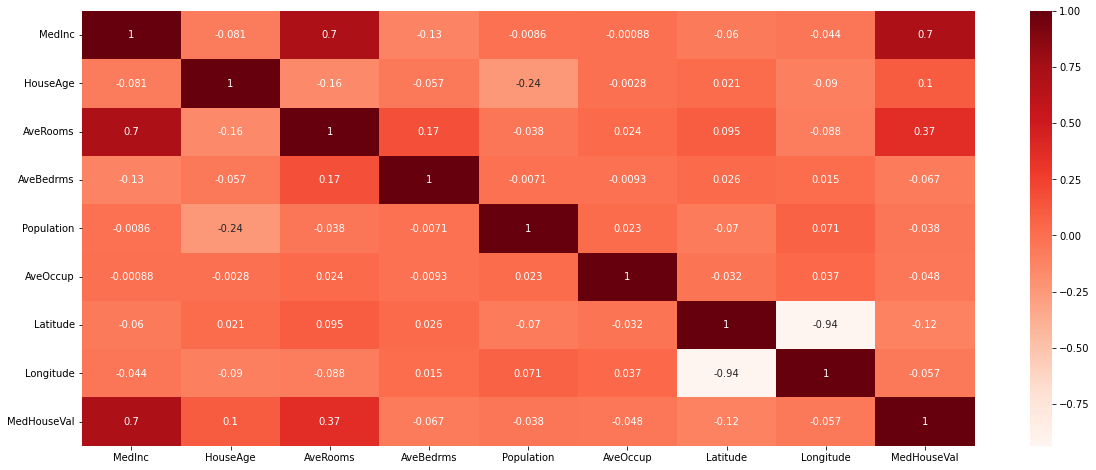

In [91]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [92]:
"""threshold = 0.85
cor_mat = df.corr().abs()
upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
print(to_drop)
df = df.drop(to_drop, axis=1)"""

'threshold = 0.85\ncor_mat = df.corr().abs()\nupper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape),k=1).astype(np.bool))\nto_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]\nprint(to_drop)\ndf = df.drop(to_drop, axis=1)'

In [93]:
for i in df.drop("MedHouseVal", axis=1).columns:
  q75,q25 = np.percentile(df.loc[:,i],[75,25])
  intr_qr = q75-q25
  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)
  df.loc[df[i] < min,i] = np.nan
  df.loc[df[i] > max,i] = np.nan
df.dropna(axis=0, inplace=True)

In [94]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41


<AxesSubplot:>

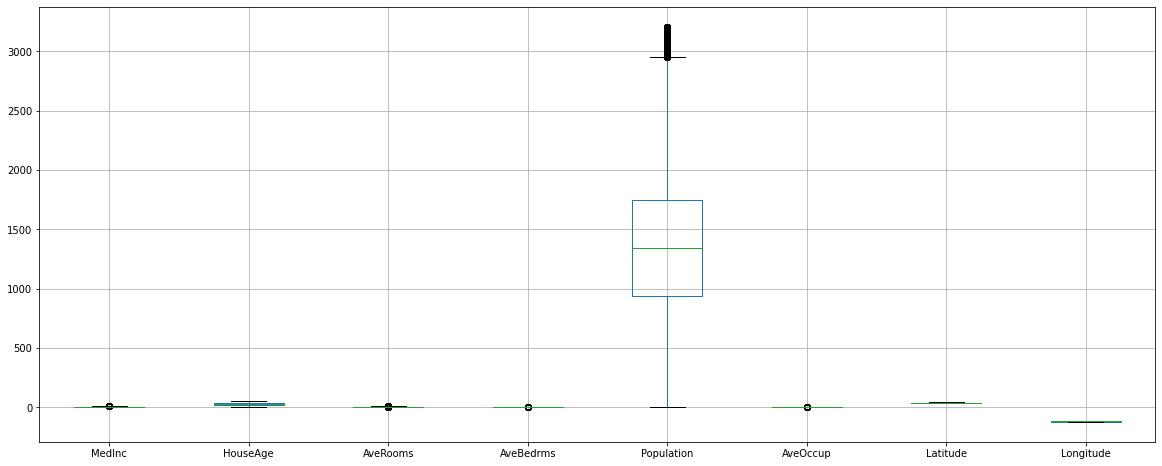

In [95]:
plt.figure(figsize=(20,8))
X.boxplot()

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X[X.columns] = scaler.transform(X)

<AxesSubplot:>

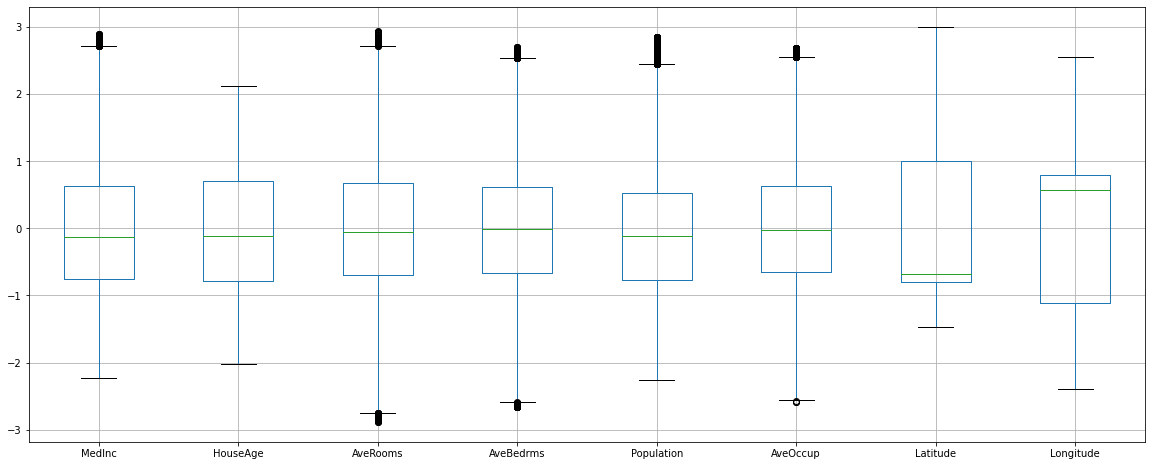

In [97]:
plt.figure(figsize=(20,8))
X.boxplot()

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
def evaluteModel(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred.clip(0, 5)
    print("error: ", mean_squared_error(y_val, y_pred, squared=False))
    return model

In [100]:
svr = evaluteModel(SVR(C=1.0, epsilon=0.2), X_train, X_val, y_train, y_val)

error:  0.6463285139696522


In [101]:
lr = evaluteModel(LinearRegression(), X_train, X_val, y_train, y_val)

error:  0.6869818703405112


In [102]:
lso = evaluteModel(Lasso(alpha=0.1), X_train, X_val, y_train, y_val)

error:  0.771872449424412


In [103]:
rid  = evaluteModel(Ridge(alpha=0.1), X_train, X_val, y_train, y_val)

error:  0.6869818579831124


In [104]:
dtr = evaluteModel(DecisionTreeRegressor(), X_train, X_val, y_train, y_val)

error:  0.8408761032718737


In [105]:
rfr = evaluteModel(RandomForestRegressor(random_state=0), X_train, X_val, y_train, y_val)

error:  0.6028673751680312


In [106]:
cbr = evaluteModel(CatBoostRegressor(loss_function='RMSE', verbose=False), X_train, X_val, y_train, y_val)

error:  0.5722633912410469


In [107]:
xgbr = evaluteModel(XGBRegressor(), X_train, X_val, y_train, y_val)

error:  0.5969187840510105


In [108]:
gbr = evaluteModel(GradientBoostingRegressor(random_state=0, loss= "squared_error"),X_train, X_val, y_train, y_val)

error:  0.5997937612152496


In [109]:

hgbr = evaluteModel(HistGradientBoostingRegressor(random_state=0),X_train, X_val, y_train, y_val)

error:  0.5758529472627182


In [110]:
lgbm = evaluteModel(LGBMRegressor(),X_train, X_val, y_train, y_val)

error:  0.5725699485691488


In [111]:
knnr = evaluteModel(KNeighborsRegressor(),X_train, X_val, y_train, y_val)

error:  0.7198440478009523


In [70]:
#abr = evaluteModel(AdaBoostRegressor(CatBoostRegressor(verbose=False)),X_train, X_val, y_train, y_val)

In [71]:
"""from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR"""

'from sklearn.linear_model import RidgeCV\nfrom sklearn.svm import LinearSVR'

In [72]:
"""estimators = [('hgbr', HistGradientBoostingRegressor(random_state=0)),
              ('cbr1', CatBoostRegressor(loss_function="RMSE", verbose=False)),
              ('cbr2', CatBoostRegressor(loss_function="RMSE", verbose=False)),
              ('cbr3', CatBoostRegressor(loss_function="RMSE", verbose=False)),
              ('cbr4', CatBoostRegressor(loss_function="RMSE", verbose=False))
             ]
reg = StackingRegressor(estimators=estimators,final_estimator=CatBoostRegressor(loss_function="RMSE", verbose=False))
sr = evaluteModel(reg, X_train, X_val, y_train, y_val)"""

'estimators = [(\'hgbr\', HistGradientBoostingRegressor(random_state=0)),\n              (\'cbr1\', CatBoostRegressor(loss_function="RMSE", verbose=False)),\n              (\'cbr2\', CatBoostRegressor(loss_function="RMSE", verbose=False)),\n              (\'cbr3\', CatBoostRegressor(loss_function="RMSE", verbose=False)),\n              (\'cbr4\', CatBoostRegressor(loss_function="RMSE", verbose=False))\n             ]\nreg = StackingRegressor(estimators=estimators,final_estimator=CatBoostRegressor(loss_function="RMSE", verbose=False))\nsr = evaluteModel(reg, X_train, X_val, y_train, y_val)'

In [73]:
"""from keras import models
from tensorflow.keras import backend as K
from keras.layers import Dense, Dropout
ann = models.Sequential([
    Dense(2, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

ann.compile(optimizer = "rmsprop", loss = root_mean_squared_error)
ann.fit(X, y, epochs=200, batch_size=64,validation_split=0.2)
"""

'from keras import models\nfrom tensorflow.keras import backend as K\nfrom keras.layers import Dense, Dropout\nann = models.Sequential([\n    Dense(2, kernel_initializer=\'normal\', activation=\'relu\'),\n    Dense(1, kernel_initializer=\'normal\', activation=\'linear\')\n  ])\ndef root_mean_squared_error(y_true, y_pred):\n        return K.sqrt(K.mean(K.square(y_pred - y_true))) \n\nann.compile(optimizer = "rmsprop", loss = root_mean_squared_error)\nann.fit(X, y, epochs=200, batch_size=64,validation_split=0.2)\n'

In [74]:
def ensemble(a,b,c, w1, w2, w3):
    l = []
    for x, y, z in zip(a, b, c):
        l.append(w1*x + w2*y + w3*z)
    return l

In [114]:
def ensembleModel(model1, model2, model3, X_train, X_val, y_train, y_val, w1, w2, w3):
    model1.fit(X_train, y_train)
    y_pred1 = model1.predict(X_val)
    y_pred1.clip(0, 5)
    model2.fit(X_train, y_train)
    y_pred2 = model2.predict(X_val)
    y_pred2.clip(0, 5)
    model3.fit(X_train, y_train)
    y_pred3 = model3.predict(X_val)
    y_pred3.clip(0, 5)
    y_pred = ensemble(y_pred1, y_pred2, y_pred3, w1, w2, w3)
    
    print("error: ", mean_squared_error(y_val, y_pred, squared=False))

In [115]:
ensembleModel(CatBoostRegressor(loss_function='RMSE', verbose=False),
            XGBRegressor(),RandomForestRegressor(random_state=0), X_train, X_val, y_train, y_val, 0.75, 0.15, 0.1)

error:  0.571604680014399


In [116]:
ensembleModel(CatBoostRegressor(loss_function='RMSE', verbose=False),
            HistGradientBoostingRegressor(random_state=0),XGBRegressor(), X_train, X_val, y_train, y_val, 0.75, 0.15, 0.1)

error:  0.5704055448206266


In [117]:
ensembleModel(CatBoostRegressor(loss_function='RMSE', verbose=False),
            HistGradientBoostingRegressor(random_state=0),XGBRegressor(), X_train, X_val, y_train, y_val, 0.7, 0.2, 0.1)

error:  0.5700587068872844


In [118]:
ensembleModel(CatBoostRegressor(loss_function='RMSE', verbose=False), LGBMRegressor(),
            HistGradientBoostingRegressor(random_state=0), X_train, X_val, y_train, y_val, 0.8, 0.15, 0.05)

error:  0.569705590613363


In [119]:
ensembleModel(CatBoostRegressor(loss_function='RMSE', verbose=False), LGBMRegressor(),
            HistGradientBoostingRegressor(random_state=0), X_train, X_val, y_train, y_val, 0.75, 0.15, 0.1)

error:  0.5693065455596117


In [120]:
ensembleModel(CatBoostRegressor(loss_function='RMSE', verbose=False), LGBMRegressor(),
            HistGradientBoostingRegressor(random_state=0), X_train, X_val, y_train, y_val, 0.6, 0.4, 0)

error:  0.5684022269718522


In [121]:
ensembleModel(CatBoostRegressor(loss_function='RMSE', verbose=False), LGBMRegressor(),
            HistGradientBoostingRegressor(random_state=0), X_train, X_val, y_train, y_val, 0.85, 0.1, 0.05)

error:  0.5702460680369266


In [83]:
def saveSubmit(model):
    test = pd.read_csv("/kaggle/input/playground-series-s3e1/test.csv")
    test.drop("id", axis=1, inplace=True)
    featureExtraction(test)
    test = test[X.columns]
    test[test.columns] = scaler.transform(test)
    prediction = model.predict(test)
    submission = pd.DataFrame()
    submission["id"] = pd.read_csv("/kaggle/input/playground-series-s3e1/test.csv")["id"]
    submission["MedHouseVal"] = prediction
    submission.MedHouseVal.clip(0, 5, inplace=True)
    submission.to_csv("submission.csv", index=False)

In [41]:
def saveEnsembleModel(model1, model2, model3, w1, w2, w3):
    test = pd.read_csv("/kaggle/input/playground-series-s3e1/test.csv")
    test.drop("id", axis=1, inplace=True)
    featureExtraction(test)
    test = test[X.columns]
    test[test.columns] = scaler.transform(test)
    prediction1 = model1.predict(test)
    prediction2 = model2.predict(test)
    prediction3 = model3.predict(test)
    prediction = ensemble(prediction1, prediction2, prediction3, w1, w2, w3)
    submission = pd.DataFrame()
    submission["id"] = pd.read_csv("/kaggle/input/playground-series-s3e1/test.csv")["id"]
    submission["MedHouseVal"] = prediction
    submission.MedHouseVal.clip(0, 5, inplace=True)
    submission.to_csv("submission.csv", index=False)

In [122]:
#saveSubmit(hbr)
saveEnsembleModel(cbr, hgbr, xgbr, 0.75, 0.15, 0.1)